## Valores nulos

Vamos a realizar un analisis de los valores nulos (NaN).

Para ello comenzamos leyendo los datos y viendo cuantos datos faltantes hay por columna:

In [3]:
import pandas as pd

#Lectura de la base de datos
df = pd.read_csv('DB/cars.csv', sep=';') # Cambio en el separador

#Valores nulos
df_nulls = pd.DataFrame(df.isnull().sum(), index=df.columns, columns=['Nulos'])
df_nulls

,Nulos
CODE,0
PRODUCTO,0
TIPO_CARROCERIA,0
COMBUSTIBLE,0
Potencia_,0
TRANS,0
FORMA_PAGO,0
ESTADO_CIVIL,890
GENERO,860
OcupaciOn,0


Vemos que tenemos datos nulos en 4 columnas, vamos a mostrar el contenido de dichas columnas en un dataframe por separado para una mayor visualizacion

In [4]:
null_df = df[['Averia_grave', 'ESTADO_CIVIL', 'GENERO', 'Zona _Renta']]
null_df

,Averia_grave,ESTADO_CIVIL,GENERO,Zona _Renta
0,Averia muy grave,CASADO,M,Medio-Bajo
1,No,CASADO,F,Medio-Bajo
2,No,CASADO,M,Medio
3,Averia muy grave,CASADO,F,Medio
4,No,CASADO,F,Alto
...,...,...,...,...
58044,Averia muy grave,SOLTERO,F,NaN
58045,No,NaN,NaN,Medio-Bajo
58046,No,CASADO,M,Medio
58047,No,CASADO,M,Medio-Bajo


Vemos los valores faltantes. 

En este caso, vamos a sustituirlos por 'Desconocido' (ya que estas columnas no son de tipo numerico), salvo en el caso de la columna 'Averia_grave', que al contener un unico valor faltante, vamos a dropear el registro en el que se encuentre dicho valor: 

In [5]:
null_cols = []
# Sustituimos valores nulos
for column, count in df_nulls['Nulos'].items():
    if count != 0:
        null_cols.append(column)
        if column == 'Averia_grave':
            df.dropna(subset=[column], inplace=True)
        elif column == 'ESTADO_CIVIL':
            df[column] = df[column].fillna('DESCONOCIDO')
        elif column == 'GENERO':
            df[column] = df[column].fillna('O')
        elif column == 'Zona _Renta':
            df[column] = df[column].fillna('Desconocido')   

# Una vez que se han eliminado los valores nulos, verificamos que hemos hecho la transoformacion correctamente
df_nulls = pd.DataFrame(df.isnull().sum(), index=df.columns, columns=['Nulos'])
df_nulls.loc[null_cols]

,Nulos
ESTADO_CIVIL,0
GENERO,0
Zona _Renta,0
Averia_grave,0


Vemos que hemos solucionado el problema de los valores nulos perfectamente.

## Heatmap y boxplots

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

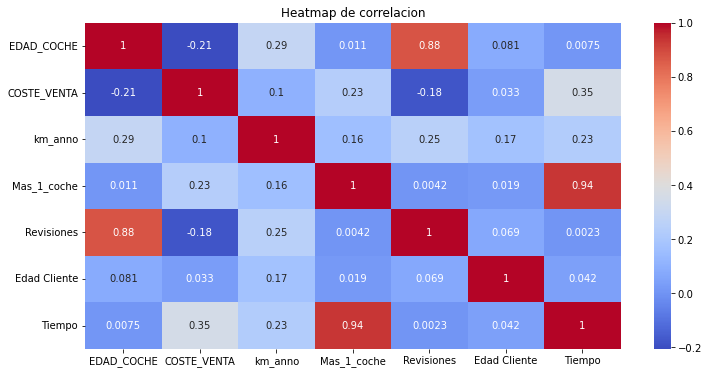

In [7]:
num_col = df.select_dtypes(include = ['float64', 'int64']).columns
corr = df[num_col].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap de correlacion')
plt.show()

Como vemos hay variables muy relacionadas entre sí. Esto no va a favorecer a nuestro modelo, por lo que las vamos a eliminar:

In [8]:
df.drop(['Tiempo', 'Revisiones'], axis=1, inplace=True)

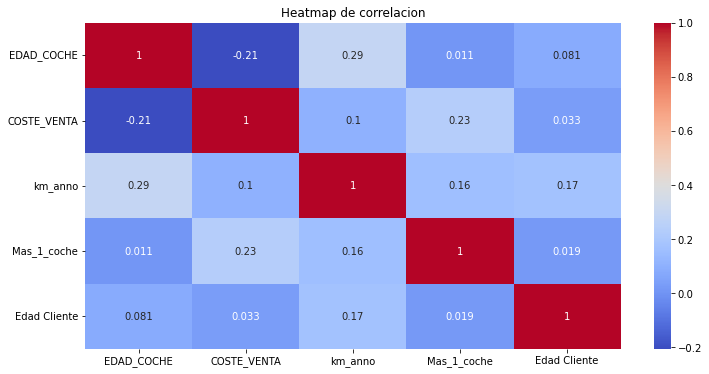

In [9]:
num_col = df.select_dtypes(include = ['float64', 'int64']).columns
corr = df[num_col].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap de correlacion')
plt.show()

Ahora ya vemos que no hay ninguna variable muy relacionada entre sí.

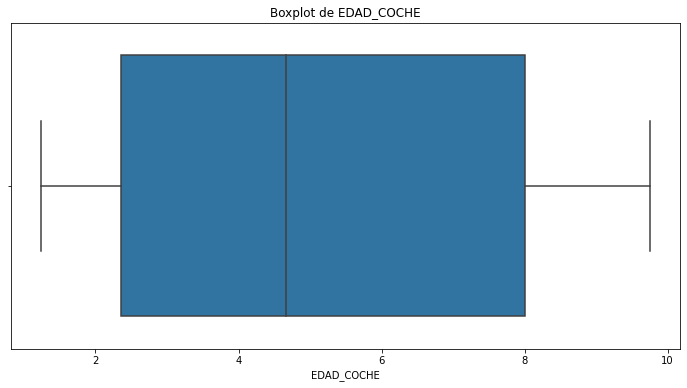

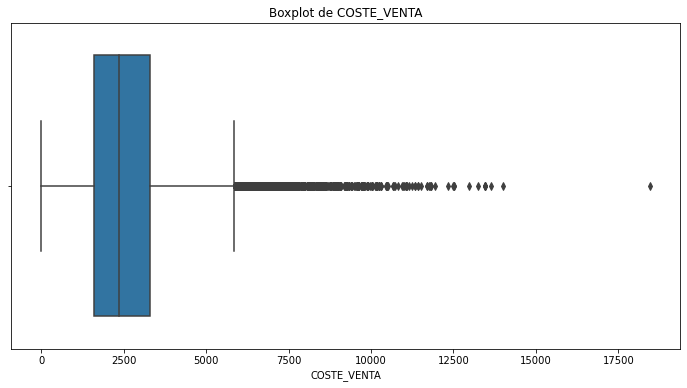

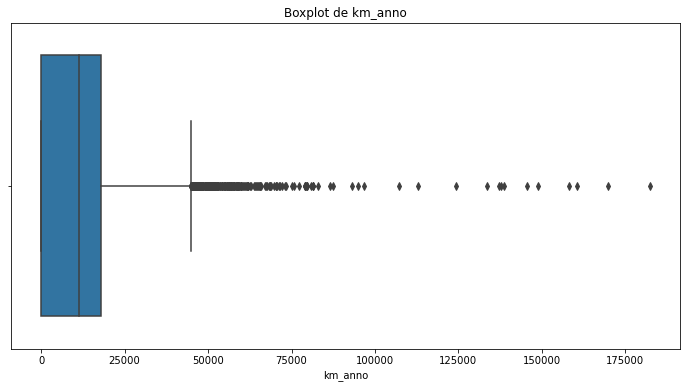

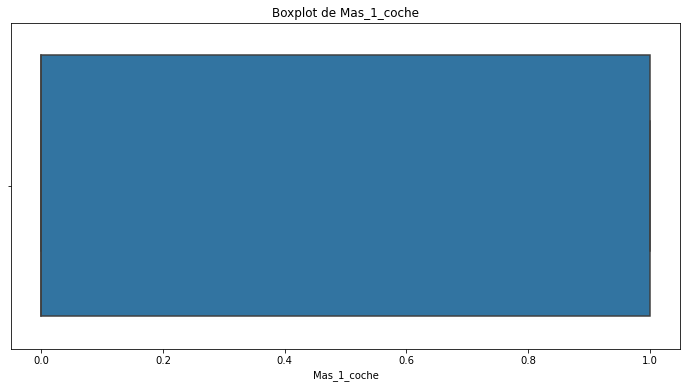

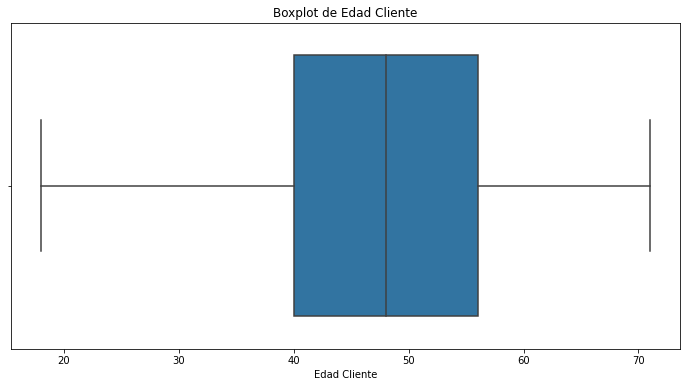

In [10]:
num_col = df.select_dtypes(include = ['float64', 'int64']).columns
for col in num_col:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()